In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Problem Statement - Dimentionality Reduction-Dataset.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.shape

(550068, 12)

In [5]:
data.isna().sum()/len(data)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

It can be seen that almost 70% of the values in Product_category_3 is missing, so this feature can be dropped.

In [6]:
data = data.drop(['Product_Category_3'],axis=1)

In [7]:
l = data['Product_Category_2'].mode()

In [8]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

In [9]:
data['Product_Category_2']  = data['Product_Category_2'].fillna(data['Product_Category_2'].median())

For product_category_2 the missing values are repaced with the median value of the feature.

In [10]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Purchase                      18105
dtype: int64

In [11]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

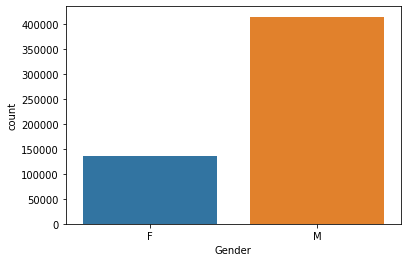

In [12]:
sns.countplot(data['Gender'])

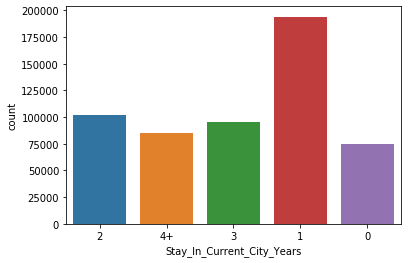

In [13]:
sns.countplot(data['Stay_In_Current_City_Years'])

Text(0.5, 1.0, 'City_category')

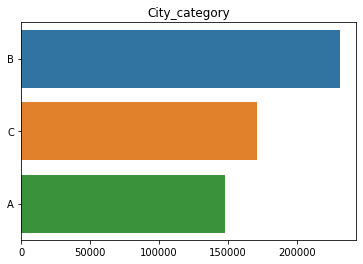

In [14]:
sns.barplot(x=data['City_Category'].value_counts().values,y=data['City_Category'].value_counts().index)
plt.title('City_category')

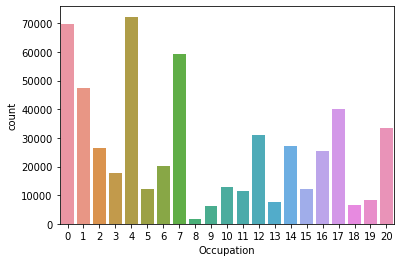

In [16]:
sns.countplot(data['Occupation'])

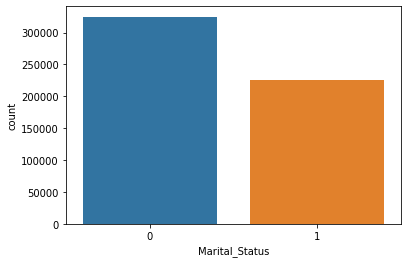

In [17]:
sns.countplot(data['Marital_Status'])

In [18]:
def to_cat(var):
    for j,i in enumerate(var):
        data[i] = data[i].astype('category')

In [19]:
cat = ['Occupation','Product_Category_1','Product_Category_2','Marital_Status']

In [20]:
to_cat(cat)

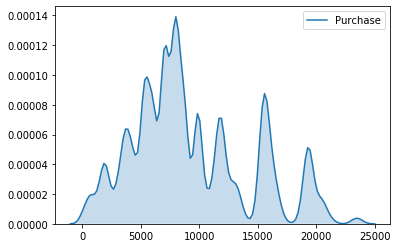

In [21]:
sns.kdeplot(data['Purchase'],shade=True)

In [22]:
data['Age'] = data['Age'].map({
    '0-17':1,
    '18-25':2,
    '26-35':3,
    '36-45':4,
    '46-50':5,
    '50-55':6,
    '55+':7
}).astype('category')
data['City_Category'] = data['City_Category'].map({
    'A':1,
    'B':2,
    'C':3
}).astype('category')
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({
    '0':1,
    '1':2,
    '2':3,
    '3':4,
    '4+':5
}).astype('category')
data['Gender'] = data['Gender'].map({
    'M':1,
    'F':0
}).astype('category')

In [23]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,1.0,10,1,3,0,3,9.0,8370
1,1000001,P00248942,0,1.0,10,1,3,0,1,6.0,15200
2,1000001,P00087842,0,1.0,10,1,3,0,12,9.0,1422
3,1000001,P00085442,0,1.0,10,1,3,0,12,14.0,1057
4,1000002,P00285442,1,7.0,16,3,5,0,8,9.0,7969
5,1000003,P00193542,1,3.0,15,1,4,0,1,2.0,15227
6,1000004,P00184942,1,5.0,7,2,3,1,1,8.0,19215
7,1000004,P00346142,1,5.0,7,2,3,1,1,15.0,15854
8,1000004,P0097242,1,5.0,7,2,3,1,1,16.0,15686
9,1000005,P00274942,1,3.0,20,1,2,1,8,9.0,7871


All the categorical varibles are converted into numbers.

In [24]:
x = data.drop(['User_ID','Product_ID','Purchase'],axis=1)
y = data['Purchase']

In [25]:
x = pd.get_dummies(x,drop_first=True)

In [26]:
x.head()

,Gender_1,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_7.0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


New data is obtained using one-hot encoding, the number of features for the current dataset is 68.

In [27]:
from sklearn.preprocessing import StandardScaler
scalar  = StandardScaler()

In [28]:
x_t = scalar.fit_transform(x)
x_t = pd.DataFrame(x_t,columns=x.columns)

In [29]:
x_t.head()

,Gender_1,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_7.0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.201702,-0.30717,-0.225368,-0.182073,-0.389035,...,1.437823,-0.074584,-0.162397,-0.100756,-0.139709,-0.333674,-0.271854,-0.292142,-0.157531,-0.071142
1,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.201702,-0.30717,-0.225368,-0.182073,-0.389035,...,-0.695496,-0.074584,-0.162397,-0.100756,-0.139709,-0.333674,-0.271854,-0.292142,-0.157531,-0.071142
2,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.201702,-0.30717,-0.225368,-0.182073,-0.389035,...,1.437823,-0.074584,-0.162397,-0.100756,-0.139709,-0.333674,-0.271854,-0.292142,-0.157531,-0.071142
3,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.201702,-0.30717,-0.225368,-0.182073,-0.389035,...,-0.695496,-0.074584,-0.162397,-0.100756,-0.139709,2.996938,-0.271854,-0.292142,-0.157531,-0.071142
4,0.572570,-0.470389,-0.815136,-0.499998,-0.301016,4.957802,-0.30717,-0.225368,-0.182073,-0.389035,...,1.437823,-0.074584,-0.162397,-0.100756,-0.139709,-0.333674,-0.271854,-0.292142,-0.157531,-0.071142


The data is transfromed and scaled so that the variations among the features are reduced.

Text(0.5, 1, 'Heatmap of correlation')

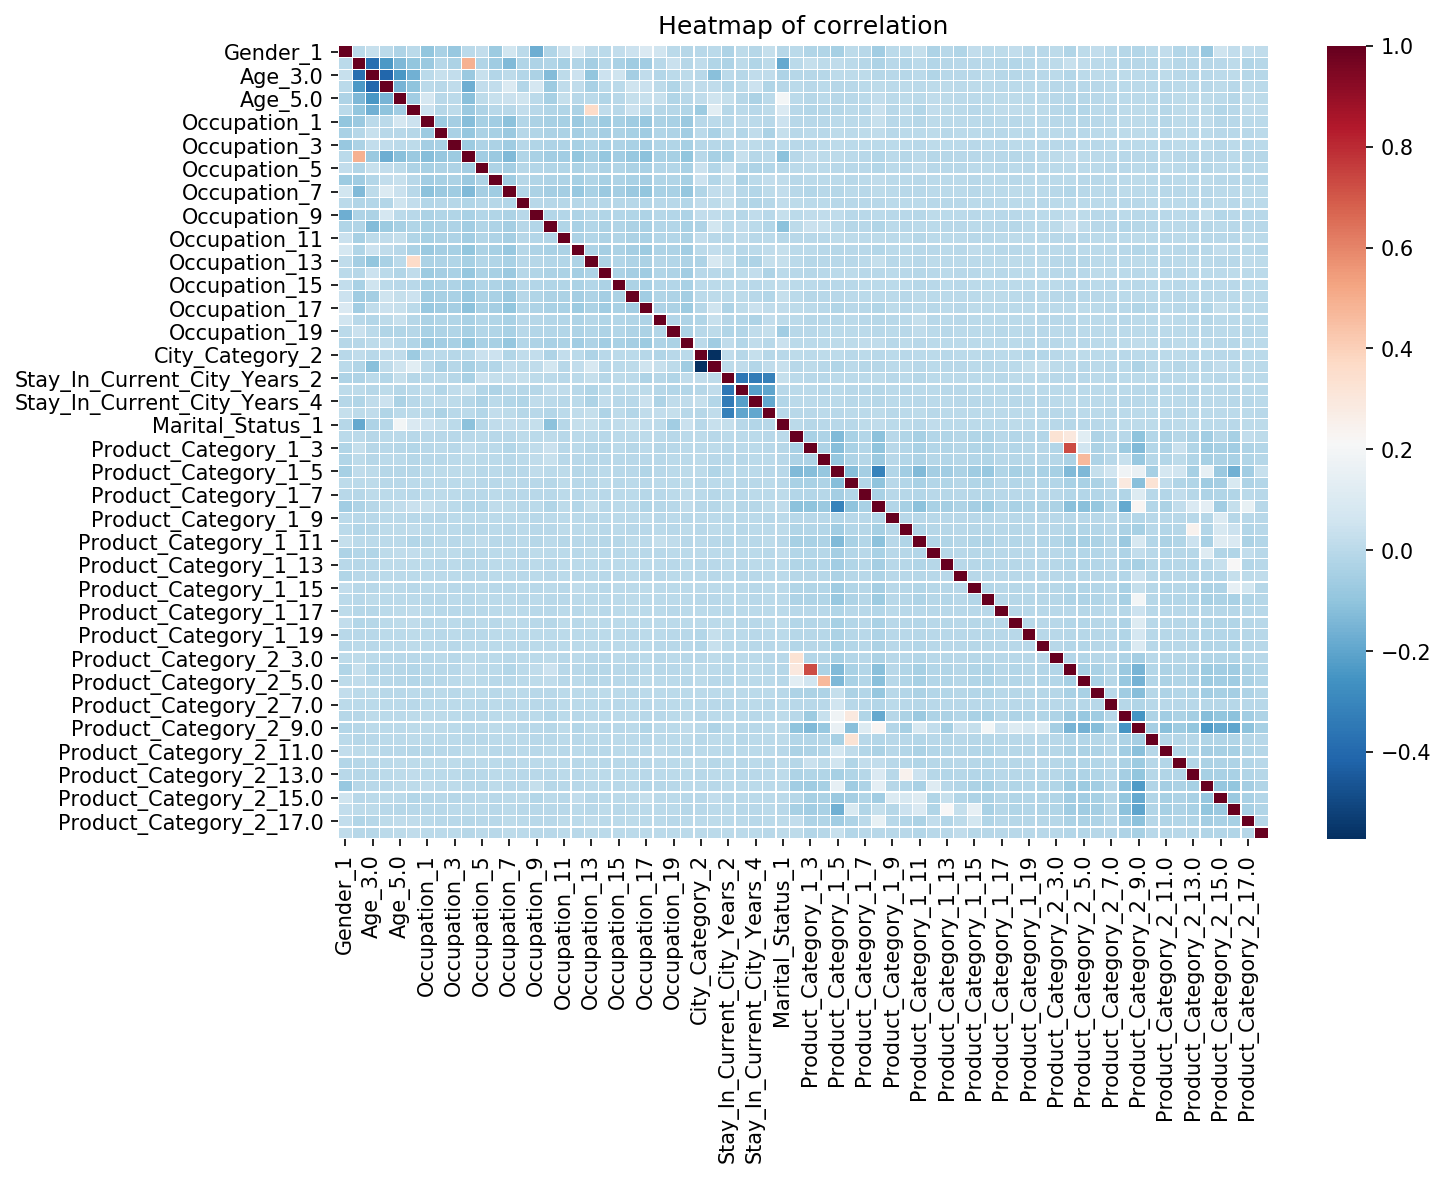

In [30]:
plt.figure(figsize=(10,7),dpi=150)
sns.heatmap(x_t.corr(),linewidths=0.1,cmap='RdBu_r')
plt.title('Heatmap of correlation')

To find the most correlated features heatmap of the correlation matix is plotted. From this figure it can be seen that the most correlated fdeatures will have dark blue and dark red colour.

In [32]:
c = x_t.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)

The below code gives the most correlated features which are above 0.5 and below 1.0.

In [33]:

corr_features =[]
for i in range(len(so)):
    if (so.values[i]>0.5) and (so.values[i]<1.0):
        corr_features.append([so.index[i],so.values[i]])

In [34]:
corr_features

[[('Product_Category_1_3', 'Product_Category_2_4.0'), 0.7289785059537619],
 [('Product_Category_2_4.0', 'Product_Category_1_3'), 0.7289785059537619],
 [('City_Category_2', 'City_Category_3'), 0.5722773756511379],
 [('City_Category_3', 'City_Category_2'), 0.5722773756511379]]

It can be seen that there are only two highly correlated features, they are 
* Product_category_1_3 and Product_Category_2_4.0
* City_Category_2 and City_Category_3

In [35]:
cov_x_t = pd.DataFrame.cov(x_t)

Text(0.5, 1, 'Covarinace matrix Heatmap')

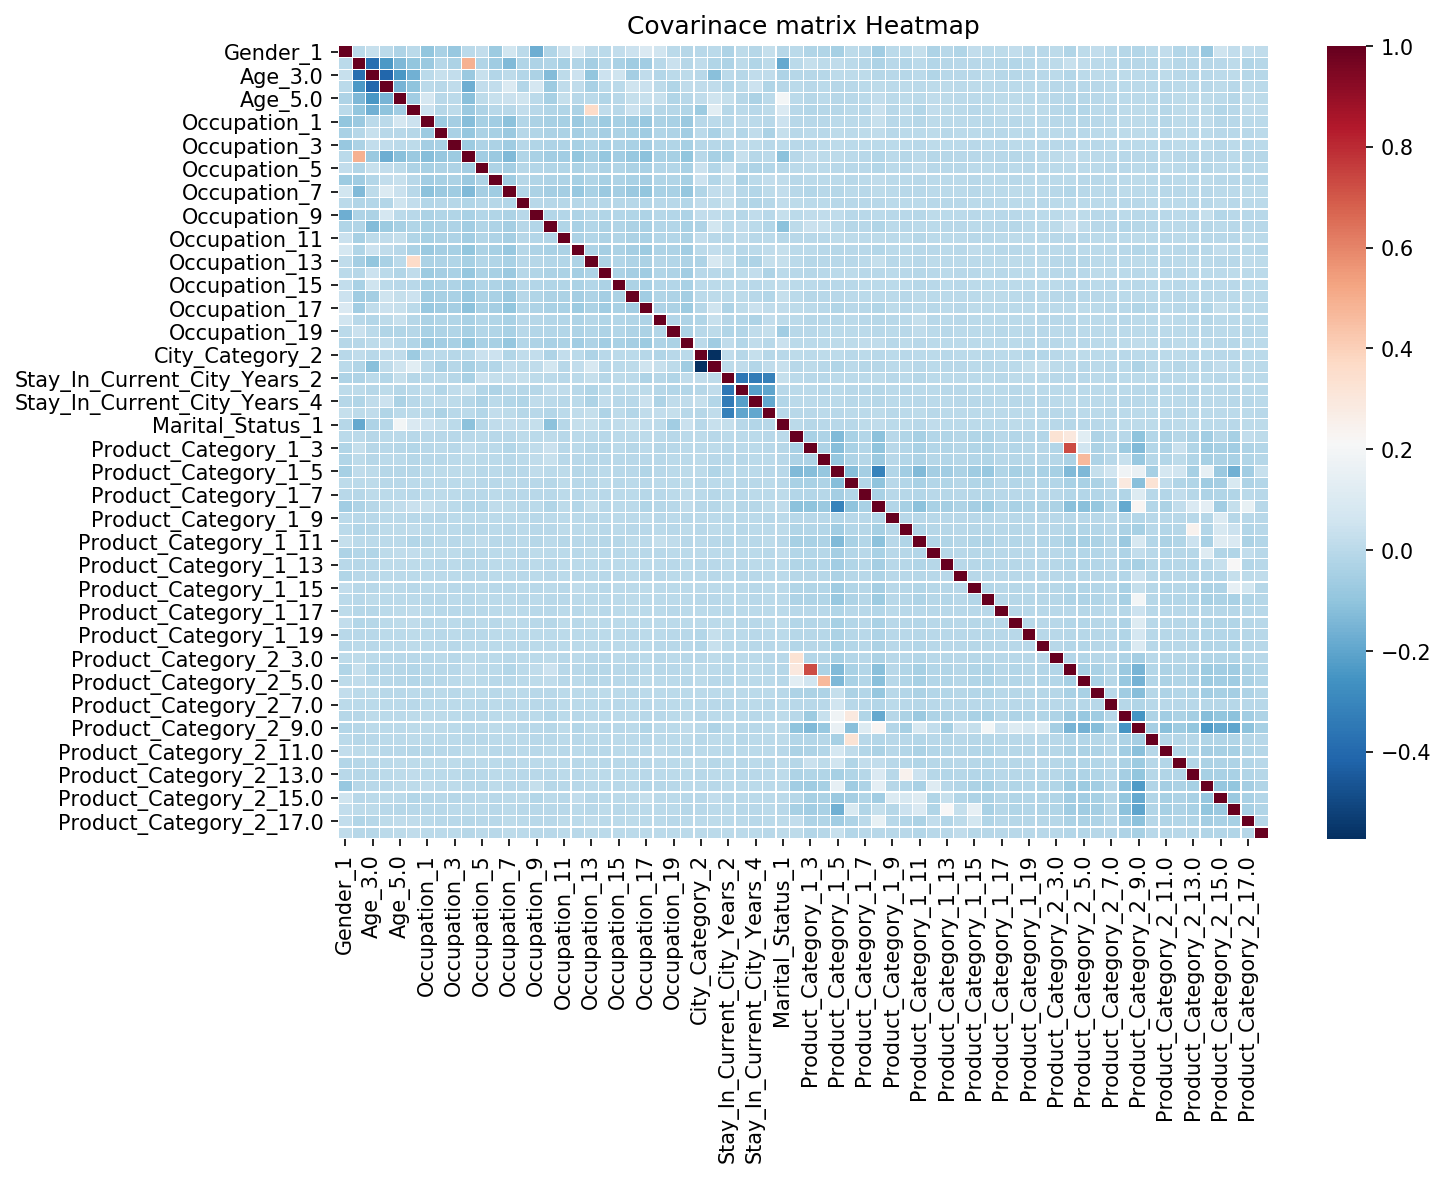

In [36]:
plt.figure(figsize=(10,7),dpi=150)
sns.heatmap(cov_x_t,linewidths=0.1,cmap='RdBu_r')
plt.title('Covarinace matrix Heatmap')

In [37]:
eigen_val,eigen_vect = np.linalg.eigh(cov_x_t)

In [38]:
eigen_val

array([0.05893623, 0.10272804, 0.13445807, 0.1689445 , 0.17676118,
       0.27281038, 0.40363536, 0.51612936, 0.53588831, 0.55717762,
       0.65440317, 0.66880146, 0.72115602, 0.72915264, 0.76842936,
       0.78905678, 0.84637143, 0.87329336, 0.91859662, 0.95166542,
       0.97293082, 0.97689774, 0.98374767, 0.98687996, 0.99402428,
       0.99770321, 0.99988149, 1.00216894, 1.0026502 , 1.0052109 ,
       1.00625152, 1.01075135, 1.01242614, 1.01520455, 1.01878442,
       1.02119177, 1.02733293, 1.03044903, 1.03415214, 1.03958787,
       1.04480933, 1.04850791, 1.05098912, 1.05738047, 1.05938789,
       1.06597537, 1.07062552, 1.08998228, 1.09286775, 1.10252274,
       1.16488805, 1.18706923, 1.22831085, 1.25471607, 1.26412065,
       1.27456408, 1.31829936, 1.3490045 , 1.39378388, 1.41970362,
       1.45240317, 1.5021765 , 1.5365593 , 1.61133663, 1.71879803,
       1.73989331, 1.87246031, 2.04236546])

These are the eigen values of the covariance matrix.

In [39]:
eigen_vect

array([[-4.45445336e-03,  3.49056850e-03, -6.67873671e-03, ...,
         2.80321430e-02, -5.33126483e-03,  1.14029352e-02],
       [-1.59653754e-06, -4.96174007e-01, -2.17015105e-02, ...,
        -2.67015442e-01,  4.78197514e-01,  2.64975605e-01],
       [-9.66342403e-04, -5.86400444e-01,  1.74934492e-02, ...,
         3.52780160e-01, -8.73382318e-03, -5.82449831e-02],
       ...,
       [ 2.46208864e-01,  1.30235740e-04, -2.50480375e-03, ...,
        -6.58447522e-03, -3.63025071e-02,  3.93432969e-03],
       [ 1.64883454e-01, -3.65048034e-03, -1.37070922e-03, ...,
        -6.88425572e-02, -5.03013884e-02, -3.94384534e-02],
       [ 7.00479989e-02, -5.90325196e-03, -8.77380846e-04, ...,
         6.24769567e-03, -1.48792358e-02, -1.22898950e-02]])

These are the eigen vectors of the covarince matrix.

In [47]:
sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigen_value = eigen_val[sorted_index]
sorted_eigen_vect = eigen_vect[:,sorted_index]
for i in range(2):
    print(sorted_eigen_value[i],sorted_eigen_vect[i])

2.0423654581711435 [ 1.14029352e-02 -5.33126483e-03  2.80321430e-02 -6.22838741e-02
  1.96016202e-01 -1.31876361e-01  2.37500660e-01 -6.14336688e-02
  1.93057075e-01 -1.25680857e-01  2.01973491e-01 -8.99783957e-02
  2.91687232e-02  1.88446722e-02  3.76388402e-01 -9.05551598e-02
  1.58985654e-01  4.84325779e-02 -5.90953159e-02 -1.17821829e-01
 -6.21191285e-03  7.12765063e-02  6.65206961e-02  3.08042548e-02
  7.14342763e-03  3.29677534e-02  2.24820563e-02  4.85228920e-02
  4.35837455e-03  3.40097532e-02  2.00850326e-02  3.21087873e-02
  4.45030878e-04 -1.06726093e-02 -4.15117940e-02 -3.48680043e-02
 -1.81029676e-02 -6.98412358e-03 -9.72570526e-03 -3.17093013e-02
 -1.21182574e-02 -1.21294362e-02 -6.97199871e-03 -4.06380255e-02
 -2.52559340e-02 -3.58593093e-02 -9.42276232e-03  3.34575115e-02
  3.53437118e-02  4.08692925e-03 -1.52848618e-02 -9.00106695e-04
  1.26851633e-01 -1.53385222e-02 -7.20805662e-01  5.56605239e-02
 -6.48132017e-02 -6.29020532e-02  5.23584786e-02 -3.91929530e-03
  2.94

Most important principal component of the covariance matrix will be the eigen vector which has the maximum variance which is shown above.

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA().fit(x_t)

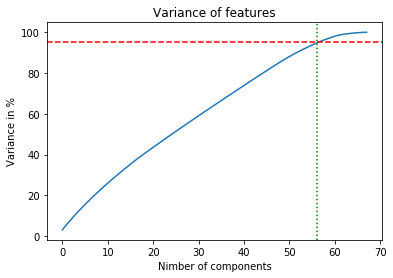

In [50]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Nimber of components')
plt.ylabel('Variance in %')
plt.title('Variance of features')
plt.axhline(y=95,color='r',linestyle= '--')
plt.axvline(x=56,color='g',linestyle= ':')
plt.show()

From the figure it can be seen that almost 56 features has to be retained indorder to get a maximum variance of 95%.

In [51]:
pca.explained_variance_ratio_*100

array([3.00347315, 2.7536131 , 2.55866198, 2.52763956, 2.36960838,
       2.25964193, 2.20907907, 2.13588314, 2.08779565, 2.04967845,
       1.98382655, 1.938672  , 1.87435554, 1.85899757, 1.84516733,
       1.8063362 , 1.74568688, 1.71306754, 1.62135402, 1.60715554,
       1.6029122 , 1.57444644, 1.56760798, 1.55792053, 1.55496846,
       1.54556942, 1.5419206 , 1.53648151, 1.52880291, 1.5208092 ,
       1.51536346, 1.51078098, 1.50174987, 1.49820966, 1.49294516,
       1.48885926, 1.48639634, 1.47977896, 1.47824864, 1.47448291,
       1.47377517, 1.47041128, 1.46720794, 1.46179776, 1.45129143,
       1.44668512, 1.43661171, 1.43077802, 1.39950543, 1.35087493,
       1.28425261, 1.2446616 , 1.16037551, 1.13004113, 1.07228134,
       1.06052163, 0.98352976, 0.96235585, 0.81937737, 0.78806961,
       0.75901238, 0.59358033, 0.401191  , 0.25994243, 0.24844735,
       0.19773209, 0.15107037, 0.08667077])

Above figure shows the variance of each components in descending order.

In [53]:
pca  = PCA(n_components=8).fit(x_t)

In [54]:
x_pca_t = pca.transform(x_t)

In [55]:
x_pca_t.shape

(550068, 8)

In [56]:
x_pca_t = pd.DataFrame(x_pca_t)

In [57]:
x_pca_t

,0,1,2,3,4,5,6,7
0,2.619003,0.702700,1.579838,-1.176833,-1.655822,-0.400656,0.473568,0.447152
1,0.832070,-0.277112,0.354054,0.912976,-0.601534,0.377171,-0.208764,1.269495
2,-0.231096,-0.194816,1.442626,-0.808637,-0.738654,-0.074905,-1.365242,-0.700680
3,0.115509,0.006816,0.863572,-0.173465,-1.086489,0.183765,-2.111067,-0.909657
4,-1.725095,1.438476,3.234033,0.902415,0.345450,-0.235778,0.144899,0.140241
...,...,...,...,...,...,...,...,...
550063,-1.782489,1.277519,2.704440,0.224515,-1.088540,-0.131751,0.098827,-2.167161
550064,-1.181691,0.292745,2.020001,-0.324537,-0.957024,-0.568223,1.233560,0.010926
550065,-1.231467,-0.205355,0.302643,-1.752480,-0.535257,-1.179075,1.571896,-0.646270
550066,-1.592867,1.364873,3.868564,1.135004,-1.500036,-0.099174,0.693628,-0.472587


Above table shows the important 8 features obtained through PCA.